Siendo un ejecutivo de la Universidad "Universidad", se quiere identificar los campus que han tenido mayor crecimiento de ingresos en los últimos años, aprender de esos casos de éxito, y averiguar que se podría hacer para incrementar el crecimiento de los campus con menor registro de ingresos.

In [1]:
#Se importan librerias
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Se parsea el xml
tree = ET.parse('historico_ingresos_individuales.xml')
root = tree.getroot()

In [3]:
#Se extraen los datos a lista
data = []
for ingreso in root.findall(".//Ingreso"):
    record = {
        "AlumnoID": ingreso.find("AlumnoID").text,
        "Anio": ingreso.find("Anio").text,
        "Campus": ingreso.find("Campus").text,
        "Programa": ingreso.find("Programa").text,
        "Genero": ingreso.find("Genero").text
    }
    data.append(record)

In [4]:
#Se convierte la lista a df
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlumnoID  200 non-null    object
 1   Anio      200 non-null    object
 2   Campus    200 non-null    object
 3   Programa  200 non-null    object
 4   Genero    200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [6]:
df.head()

,AlumnoID,Anio,Campus,Programa,Genero
0,1,2022,Campus Este,Arquitectura,Masculino
1,2,2015,Campus Norte,Derecho,Masculino
2,3,2019,Campus Sur,Ingeniería Civil,Otro
3,4,2022,Campus Oeste,Ingeniería en Sistemas,Femenino
4,5,2024,Campus Centro,Psicología,Femenino


In [7]:
#Se cuenta cuántos ingresos hay por campus
df['Campus'].value_counts()

Campus
Campus Este      43
Campus Oeste     43
Campus Sur       42
Campus Centro    41
Campus Norte     31
Name: count, dtype: int64

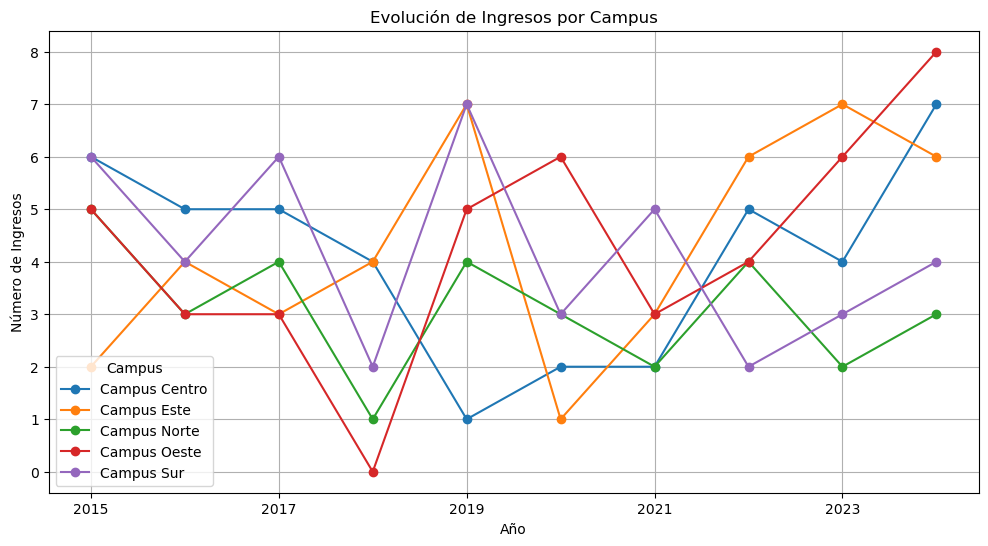

In [8]:
#Se agrupa por año y campus para crear gráfica que muestre un historico de ingresos
campus_anio = df.groupby(['Anio', 'Campus']).size().unstack().fillna(0)
campus_anio.plot(kind='line', marker='o', title='Evolución de Ingresos por Campus', figsize=(12,6))
plt.xlabel("Año")
plt.ylabel("Número de Ingresos")
plt.grid(True)

In [9]:
#Se calcula la tasa de ingreso
crecimiento = df.groupby(['Campus', 'Anio']).size().unstack().T.pct_change().mean()
crecimiento.sort_values(ascending=False)


Campus
Campus Este      0.444444
Campus Norte     0.288889
Campus Sur       0.258730
Campus Centro    0.214815
Campus Oeste     0.125926
dtype: float64

Al ver la gráfica de líneas podemos notar que Campus Norte desde el inicio no ha registrado un gran número de ingresos, demostrando poco crecimiento.
Y al ver la tasa de ingreso podemos notar que Campus Este tiene el mayor crecimiento sostenido, lo que demuestra relevancia en los últimos años (después de 2020).

In [10]:
#Se crea un df solo con los registros Este
este_df = df[df['Campus']=='Campus Este']

<Axes: title={'center': 'Programas más populares en Campus Este'}, ylabel='Programa'>

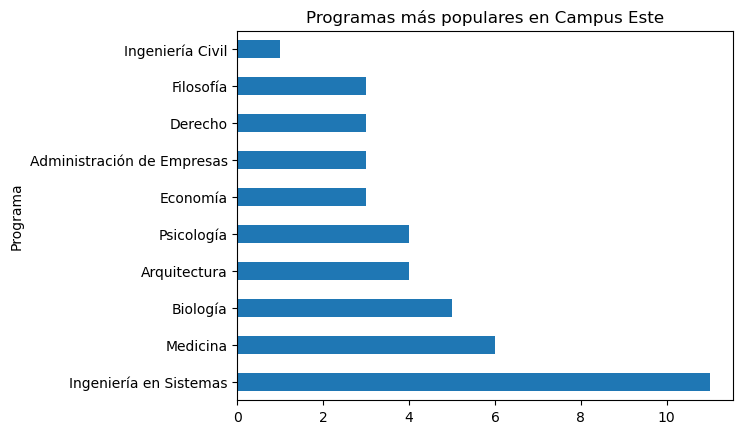

In [18]:
#Se crea gráfica para visualizar los programas más populares en el campus
proEste = este_df['Programa'].value_counts()
proEste.plot(kind='barh', title='Programas más populares en Campus Este')

<Axes: title={'center': 'Programas más populares en Campus Norte'}, ylabel='Programa'>

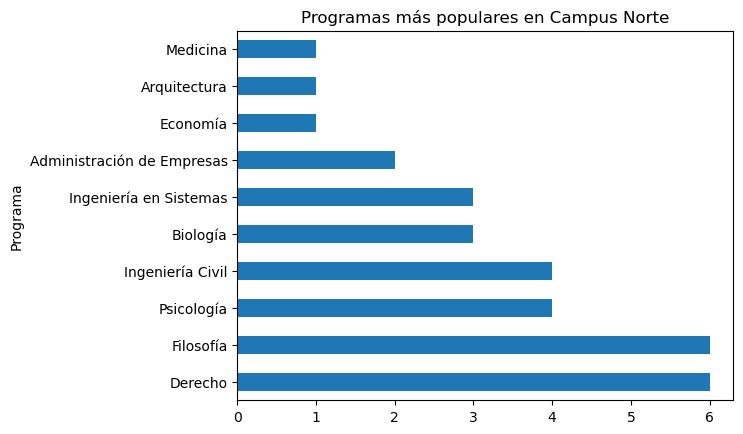

In [19]:
#Se crea df solo con registros de Norte y se crea gráfica para visualizar los programas más demandados
norte_df = df[df['Campus']=='Campus Norte']
proNorte = norte_df['Programa'].value_counts()
proNorte.plot(kind='barh', title='Programas más populares en Campus Norte')

Ambos campus ofrecen los mismos programas, sin embargo Campus Norte no ha capitalizado en los programas más atractivos en la actualidad (aquellos que son populares en Campus Este).
Para atraer más personas, se podría crear campañas dirigidas para Ingeniería en Sistemas y Medicina en Campus Norte.